# Data download and processing from Swissprot

Downloaded the data on 13th of May 2024. 571,282 results filtering for reviewed "Swiss-Prot". (https://www.uniprot.org/uniprotkb?query=*&facets=reviewed%3Atrue)

Selected download TSV and the columns, Seqeunce (under Sequences tab), EC number (under Function).

Unzipped the downloaded file.

## 1. Protein to EC processing


In [1]:
import pandas as pd

swissprot = pd.read_csv('raw_data/uniprotkb_AND_reviewed_true_2024_05_13.tsv', sep='\t')
swissprot

,Entry,Entry Name,Length,Sequence,EC number
0,A0A009IHW8,ABTIR_ACIB9,269,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-; 3.2.2.6
1,A0A023I7E1,ENG1_RHIMI,796,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39
2,A0A024B7W1,POLG_ZIKVF,3423,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,2.1.1.56; 2.1.1.57; 2.7.7.48; 3.4.21.91; 3.6.1...
3,A0A024SC78,CUTI1_HYPJR,248,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74
4,A0A024SH76,GUX2_HYPJR,471,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91
...,...,...,...,...,...
571277,V9HVX0,YPAA_ECOLI,61,MTIAERLRQEGHQIGWQEGKLEGLHEQAIKIALRMLEQGFDRDQVL...,NaN
571278,W5X2N3,AP_FRAAN,193,MGWVWKDDDEQGGHVNPSAADISPRLDGDRCSTRKVVRTQCKTEEV...,NaN
571279,W6JGV7,REP_CPBDV,484,MSAPLSIEQDDLLTDDLKSWLSDIDFSNDNEEAIEMEPSDIEMSSP...,NaN
571280,W6JHZ8,VP1_CPBDV,210,MNVKGASDKAQLAMQAEWEEVLAPEGALAVEEASSVLKISDDERRS...,NaN


Drop sequences that are fragments

In [3]:
fragments = pd.read_csv('raw_data/fragments.tsv', sep='\t')['Entry'].values
swissprot = swissprot[~swissprot['Entry'].isin(fragments)]
swissprot


,Entry,Entry Name,Length,Sequence,EC number
0,A0A009IHW8,ABTIR_ACIB9,269,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.-; 3.2.2.6
1,A0A023I7E1,ENG1_RHIMI,796,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39
2,A0A024B7W1,POLG_ZIKVF,3423,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...,2.1.1.56; 2.1.1.57; 2.7.7.48; 3.4.21.91; 3.6.1...
3,A0A024SC78,CUTI1_HYPJR,248,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74
4,A0A024SH76,GUX2_HYPJR,471,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91
...,...,...,...,...,...
571277,V9HVX0,YPAA_ECOLI,61,MTIAERLRQEGHQIGWQEGKLEGLHEQAIKIALRMLEQGFDRDQVL...,NaN
571278,W5X2N3,AP_FRAAN,193,MGWVWKDDDEQGGHVNPSAADISPRLDGDRCSTRKVVRTQCKTEEV...,NaN
571279,W6JGV7,REP_CPBDV,484,MSAPLSIEQDDLLTDDLKSWLSDIDFSNDNEEAIEMEPSDIEMSSP...,NaN
571280,W6JHZ8,VP1_CPBDV,210,MNVKGASDKAQLAMQAEWEEVLAPEGALAVEEASSVLKISDDERRS...,NaN


## Explode out EC number so each EC has it's own row

In [4]:
swissprot = swissprot[swissprot['EC number'].notna()]
# Drop rows that don't have an ec number
swissprot['EC All'] = swissprot['EC number'].values
# Now expand out the ones we have left
swissprot['EC number'] = [ec.split(';') for ec in swissprot['EC number']]
# Then check how many have mulitple
print(sum([1 if len(ec) > 1 else 0 for ec in swissprot['EC number'].values]))
swissprot = swissprot.explode('EC number')
# Clean the EC numbers
swissprot['EC number'] = [ec.replace(' ', '') for ec in swissprot['EC number']]
swissprot
print(swissprot['EC number'].nunique())
print(swissprot['Sequence'].nunique())

/tmp/ipykernel_1763802/2647129001.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swissprot['EC All'] = swissprot['EC number'].values
/tmp/ipykernel_1763802/2647129001.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swissprot['EC number'] = [ec.split(';') for ec in swissprot['EC number']]


18221
5756
230886


## Filtering steps 

* Filter to a certain sequence length
* Drop duplicates
* Remove EC numbers with dash

In [5]:
swissprot = swissprot[swissprot['Length'] > 100]
swissprot = swissprot[swissprot['Length'] < 1024] #used to be 1024
swissprot = swissprot[~swissprot['EC number'].str.contains('-')]
print('Partially filled EC numbers: ', len(swissprot))
swissprot = swissprot.drop_duplicates(subset=['Sequence', 'EC number'])
print(swissprot['EC number'].nunique())
print(swissprot['Sequence'].nunique())
swissprot

Partially filled EC numbers:  237556
5399
188331


,Entry,Entry Name,Length,Sequence,EC number,EC All
0,A0A009IHW8,ABTIR_ACIB9,269,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,3.2.2.-; 3.2.2.6
1,A0A023I7E1,ENG1_RHIMI,796,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39,3.2.1.39
3,A0A024SC78,CUTI1_HYPJR,248,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,3.1.1.74
4,A0A024SH76,GUX2_HYPJR,471,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,3.2.1.91
6,A0A044RE18,BLI_ONCVO,693,MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...,3.4.21.75,3.4.21.75
...,...,...,...,...,...,...
555831,Q05115,AMDA_BORBO,240,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,4.1.1.76
564731,Q6HX62,Y3032_BACAN,584,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,3.5.4.2
564754,Q6L032,Y1085_PICTO,573,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...,3.5.4.2,3.5.4.2
568711,Q94MV8,VG56_BPLZ5,172,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,3.6.1.12


## 2. Reaction to EC processing

EC and reaction data were downloaded from multiple sources, the first being ECReact.

1. ECReact: https://www.nature.com/articles/s41467-022-28536-w, with the data downloaded from https://github.com/rxn4chemistry/biocatalysis-model specifically, https://github.com/rxn4chemistry/biocatalysis-model/blob/main/data/ecreact-1.0.csv
2. EnzymeMap: https://chemrxiv.org/engage/chemrxiv/article-details/643e9f4034f4ff2ea4f4f84e https://zenodo.org/records/8254726 and the data https://github.com/hesther/enzymemap, using the data file https://github.com/hesther/enzymemap/blob/main/data/processed_reactions.csv.gz

In [6]:
ECreact = pd.read_csv('raw_data/ECReact.csv')
ECreact['rxn_smiles'] = ECreact['rxn_smiles'].str.split('|').str[0] + '>>' + ECreact['rxn_smiles'].str.split('>>').str[1]
ECreact.rename(columns={'rxn_smiles': 'Reaction', 'ec': 'EC number', 'source':'Source'}, inplace=True)
ECreact

,Reaction,EC number,Source
0,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,1.2.1.8,brenda_reaction_smiles
1,C=C(C)CCOP(=O)([O-])OP(=O)([O-])[O-].CC(C)=CCO...,2.5.1.85,brenda_reaction_smiles
2,N.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O...,1.4.1.4,brenda_reaction_smiles
3,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,1.1.1.3,brenda_reaction_smiles
4,Cc1cn([C@H]2C[C@H](O)[C@@H](COP(=O)(O)OP(=O)(O...,2.7.7.9,brenda_reaction_smiles
...,...,...,...
62217,CCCCC/C=C\C/C=C\C/C=C\C/C=C\C/C=C\CCC(=O)O[C@@...,2.3.1.76,pathbank_reaction_smiles
62218,CCCCCCCCCCCC/C=C\CCCCCCCC(=O)OC[C@H](COP(=O)(O...,2.7.8.41,pathbank_reaction_smiles
62219,CCCCCCCCCCCCCCCCCC(=O)O[C@H](COC(=O)CCCCCCCCCC...,2.7.8.41,pathbank_reaction_smiles
62220,CCCCCC/C=C\CCCCCCCCCCCC(=O)O[C@H](COC(=O)CCCCC...,2.7.8.41,pathbank_reaction_smiles


In [7]:
enzymemap = pd.read_csv('raw_data/EnzymeMap.csv')
print(len(enzymemap))
enzymemap.rename(columns={'ec_num': 'EC number', 'unmapped': 'Reaction', 'mapped': 'Mapped Reaction', 'orig_rxn_text':'Reaction Text'}, inplace=True)
enzymemap = enzymemap[['Reaction', 'Mapped Reaction', 'EC number', 'Reaction Text']]
enzymemap.drop_duplicates(subset=['Reaction', 'EC number'], inplace=True)
print(enzymemap['EC number'].nunique())
print(enzymemap['Reaction'].nunique())
print(enzymemap['Mapped Reaction'].nunique())
enzymemap

349458
4552
47640
47800


,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
25,CC(=O)C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)...,[CH3:1][C:2](=[O:3])[CH:4]=[O:5].[H+].[NH2:6][...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
26,CC(=O)CO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)...,[CH3:1][C:2](=[O:3])[CH2:4][OH:5].[NH2:6][C:7]...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
27,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,2-dehydro-3-deoxy-D-gluconate + NADH + H+ = 4-...
...,...,...,...,...
349453,CC(C)=CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][O:6][P:7](...,6.5.1.3,ATP + dimethylallyl diphosphate = dimethylally...
349454,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)O.Nc1ncnc2...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,6.5.1.3,ATP + geranyl diphosphate = geranyl-triphospho...
349455,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,6.5.1.3,ATP + geranyl triphosphate = geranyl-tetraphos...
349456,C=C(C)CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl diphosphate = adenosine 5'-i...


In [8]:
enzymemap.dropna(subset=['Mapped Reaction']) #just double check that all of them have mapped reactions

,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1,CCO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP...,[CH3:1][CH2:2][OH:3].[NH2:4][C:5](=[O:6])[c:7]...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
25,CC(=O)C=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)...,[CH3:1][C:2](=[O:3])[CH:4]=[O:5].[H+].[NH2:6][...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
26,CC(=O)CO.NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)...,[CH3:1][C:2](=[O:3])[CH2:4][OH:5].[NH2:6][C:7]...,1.1.1.1,methylglyoxal + NADH + H+ = acetol + NAD+ {r}
27,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,2-dehydro-3-deoxy-D-gluconate + NADH + H+ = 4-...
...,...,...,...,...
349453,CC(C)=CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][O:6][P:7](...,6.5.1.3,ATP + dimethylallyl diphosphate = dimethylally...
349454,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)O.Nc1ncnc2...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,6.5.1.3,ATP + geranyl diphosphate = geranyl-triphospho...
349455,CC(C)=CCC/C(C)=C/COP(=O)(O)OP(=O)(O)OP(=O)(O)O...,[CH3:1][C:2]([CH3:3])=[CH:4][CH2:5][CH2:6]/[C:...,6.5.1.3,ATP + geranyl triphosphate = geranyl-tetraphos...
349456,C=C(C)CCOP(=O)(O)OP(=O)(O)O.Nc1ncnc2c1ncn2[C@@...,[CH2:1]=[C:2]([CH3:3])[CH2:4][CH2:5][O:6][P:7]...,6.5.1.3,ATP + isopentenyl diphosphate = adenosine 5'-i...


### Append EC numbers that are covered by ECreact but not by EnzymeMap, to EnzymeMap

In [9]:
#find the EC numbers covered by ECreact but not by enzymemap
ECreact = ECreact[~ECreact['EC number'].str.contains('-')]
not_covered = ECreact[~ECreact['EC number'].isin(enzymemap['EC number'].unique())]
not_covered['EC number'].nunique()

2353

In [10]:
reaction2EC = pd.concat((enzymemap, not_covered[['Reaction', 'EC number']])).sort_values(by='EC number')
print(reaction2EC['EC number'].nunique())
print(reaction2EC['Reaction'].nunique())
reaction2EC

6905
56144


,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1172,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
1173,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
1176,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
1177,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
...,...,...,...,...
15228,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)([O-])OP(=O...,NaN,7.6.2.j,NaN
21396,C[C@@]1(O)OC[C@H](O)C1(O)O.Nc1ncnc2c1ncn2[C@@H...,NaN,7.6.2.l,NaN
34012,*CS(=O)(=O)[O-].Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO...,NaN,7.6.2.o,NaN
15541,Cc1ncc(C[n+]2csc(CCO)c2C)c(N)n1.Nc1ncnc2c1ncn2...,NaN,7.6.2.p,NaN


## 3. Filter protein2EC and reaction2EC to intersection of their EC numbers

In [11]:
ns_swissprot = swissprot[~swissprot['EC number'].isin(reaction2EC['EC number'].unique())]
ns_swissprot

,Entry,Entry Name,Length,Sequence,EC number,EC All
11,A0A061I403,FICD_CRIGR,455,MPMASVIAVAEPKWISVWGRFLWLTLLSMALGSLLALLLPLGAVEE...,2.7.7.108,2.7.7.108; 3.1.4.-
15,A0A067XR63,XTH7_DIOKA,268,MNAEGGNLHREFEITWGDGRARIHNNGGLLTLSLDRASGSGFRSKN...,2.4.1.207,2.4.1.207
16,A0A067XRK9,XTH6_DIOKA,299,MASSLTLPMAMAFTLLALSFASAMGGSMNSSRFDELFQPSWAFDHF...,2.4.1.207,2.4.1.207
17,A0A067YMX8,XTH8_DIOKA,288,MAASPYSIFAVQLLLLASWMLSSSSSNFNQDFNIAWGGGRARILNN...,2.4.1.207,2.4.1.207
93,A0A0C5Q4Y6,C76H2_ROSOF,493,MDSFPLLAALFFILAATWFISFRRPRNLPPGPFPYPIVGNMLQLGT...,1.14.14.175,1.14.14.-; 1.14.14.175; 1.14.14.60
...,...,...,...,...,...,...
534459,Q9ZNA5,SAHH_ROSDO,462,MTKDFIVKDIALAEFGRKELDIAETEMPGLMALRAEYGDSKPLAGA...,3.13.2.1,3.13.2.1
534465,Q9ZNJ9,MSRB_HATHI,159,MNHKKEKEYKKLDTEKLKENLTELQYNVTQRNATEKPFLNKYDKHF...,1.8.4.12,1.8.4.12
534723,V5TD18,AMBI3_FISAU,273,MIVSTSVEQSAQFSVKSLTPFGALLEATEDHSDIQQLSIEQLCQLT...,1.14.20.11,1.14.20.11
534724,V5TES5,AMBI2_FISAU,330,MTQIINITQSKVISEQILRHVFRHRRLISDTEPCVHQPCSLCLAPH...,4.1.99.25,4.1.99.25


In [12]:
len(ns_swissprot['EC number'].unique())

439

In [13]:
swissprot = swissprot[swissprot['EC number'].isin(reaction2EC['EC number'].unique())]
print(swissprot['Sequence'].nunique())
print(swissprot['EC number'].nunique())
swissprot # 149788

174744
4960


,Entry,Entry Name,Length,Sequence,EC number,EC All
0,A0A009IHW8,ABTIR_ACIB9,269,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,3.2.2.-; 3.2.2.6
1,A0A023I7E1,ENG1_RHIMI,796,MRFQVIVAAATITMITSYIPGVASQSTSDGDDLFVPVSNFDPKSIF...,3.2.1.39,3.2.1.39
3,A0A024SC78,CUTI1_HYPJR,248,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,3.1.1.74
4,A0A024SH76,GUX2_HYPJR,471,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,3.2.1.91
6,A0A044RE18,BLI_ONCVO,693,MYWQLVRILVLFDCLQKILAIEHDSICIADVDDACPEPSHTVMRLR...,3.4.21.75,3.4.21.75
...,...,...,...,...,...,...
555831,Q05115,AMDA_BORBO,240,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,4.1.1.76
564731,Q6HX62,Y3032_BACAN,584,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,3.5.4.2
564754,Q6L032,Y1085_PICTO,573,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...,3.5.4.2,3.5.4.2
568711,Q94MV8,VG56_BPLZ5,172,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,3.6.1.12


In [14]:
len(swissprot['EC number'].unique())

4960

## Save unique proteins

#save the indices corresponding to unique proteins, for downstream use
unique_protein_indices = swissprot.reset_index().drop_duplicates(subset=['Sequence']).index
with open('unique_protein_indices.txt', 'w') as f:
    for index in unique_protein_indices:
        f.write(str(index) + '\n')

In [15]:
reaction2EC = reaction2EC[reaction2EC['EC number'].isin(swissprot['EC number'].unique())]
print(reaction2EC['EC number'].nunique())
print(reaction2EC['Reaction'].nunique())
reaction2EC

4960
48392


,Reaction,Mapped Reaction,EC number,Reaction Text
0,CC=O.NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O...,[CH3:1][CH:2]=[O:3].[H+].[NH2:4][C:5](=[O:6])[...,1.1.1.1,acetaldehyde + NADH + H+ = ethanol + NAD+ {r}
1172,CC(C)(C)OC(=O)N1CCC(=O)C1.NC(=O)C1=CN([C@@H]2O...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
1173,CC(C)(C)OC(=O)N1CC[C@H](O)C1.NC(=O)c1ccc[n+]([...,[CH3:1][C:2]([CH3:3])([CH3:4])[O:5][C:6](=[O:7...,1.1.1.1,N-tert-butoxycarbonyl-3-pyrrolidinone + NADH +...
1176,NC(=O)C1=CN([C@@H]2O[C@H](COP(=O)(O)OP(=O)(O)O...,[H+].[NH2:1][C:2](=[O:3])[C:4]1=[CH:5][N:6]([C...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
1177,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)(O)OP(=O)...,[NH2:1][C:2](=[O:3])[c:4]1[cH:5][cH:6][cH:7][n...,1.1.1.1,p-nitrobenzyloxycarbonyl-3-pyrrolidinone + NAD...
...,...,...,...,...
34226,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@@H]8[C@H...,NaN,7.6.2.8,NaN
34223,CC1=C2[N+]3=C(C=C4[N+]5=C(C(C)=C6N7[C@H]([C@H]...,NaN,7.6.2.8,NaN
15471,C[N+]1(C)CCC[C@H]1C(=O)[O-].Nc1ncnc2c1ncn2[C@@...,NaN,7.6.2.9,NaN
644,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,NaN,7.6.2.9,NaN


In [17]:
reaction2EC.to_csv('../processed_data/reaction2EC.csv', index=False)

## 4. Perform protein clustering using mmseqs

Use mmseqs to identify clusters, https://github.com/soedinglab/MMseqs2

Optional parameters:

```
 --seed-sub-mat TWIN              Substitution matrix file for k-mer generation [aa:VTML80.out,nucl:nucleotide.out]
 -s FLOAT                         Sensitivity: 1.0 faster; 4.0 fast; 7.5 sensitive [4.000]
 -k INT                           k-mer length (0: automatically set to optimum) [0]
 --target-search-mode INT         target search mode (0: regular k-mer, 1: similar k-mer) [0]
 --k-score TWIN                   k-mer threshold for generating similar k-mer lists [seq:2147483647,prof:2147483647]
 --alph-size TWIN                 Alphabet size (range 2-21) [aa:21,nucl:5]
 --max-seqs INT                   Maximum results per query sequence allowed to pass the prefilter (affects sensitivity) [20]
 --split INT                      Split input into N equally distributed chunks. 0: set the best split automatically [0]
 --split-mode INT                 0: split target db; 1: split query db; 2: auto, depending on main memory [2]
 --split-memory-limit BYTE        Set max memory per split. E.g. 800B, 5K, 10M, 1G. Default (0) to all available system memory [0]
 --comp-bias-corr INT             Correct for locally biased amino acid composition (range 0-1) [1]
 --comp-bias-corr-scale FLOAT     Correct for locally biased amino acid composition (range 0-1) [1.000]
 --diag-score BOOL                Use ungapped diagonal scoring during prefilter [1]
 --exact-kmer-matching INT        Extract only exact k-mers for matching (range 0-1) [0]
 --mask INT                       Mask sequences in k-mer stage: 0: w/o low complexity masking, 1: with low complexity masking [1]
 --mask-prob FLOAT                Mask sequences is probablity is above threshold [0.900]
 --mask-lower-case INT            Lowercase letters will be excluded from k-mer search 0: include region, 1: exclude region [0]
 --min-ungapped-score INT         Accept only matches with ungapped alignment score above threshold [15]
 --add-self-matches BOOL          Artificially add entries of queries with themselves (for clustering) [0]
 --spaced-kmer-mode INT           0: use consecutive positions in k-mers; 1: use spaced k-mers [1]
 --spaced-kmer-pattern STR        User-specified spaced k-mer pattern []
 --local-tmp STR                  Path where some of the temporary files will be created []
align:
 -c FLOAT                         List matches above this fraction of aligned (covered) residues (see --cov-mode) [0.800]
 --cov-mode INT                   0: coverage of query and target
                                  1: coverage of target
                                  2: coverage of query
                                  3: target seq. length has to be at least x% of query length
                                  4: query seq. length has to be at least x% of target length
                                  5: short seq. needs to be at least x% of the other seq. length [0]
 -a BOOL                          Add backtrace string (convert to alignments with mmseqs convertalis module) [0]
 --alignment-mode INT             How to compute the alignment:
                                  0: automatic
                                  1: only score and end_pos
                                  2: also start_pos and cov
                                  3: also seq.id
                                  4: only ungapped alignment [3]
 --alignment-output-mode INT      How to compute the alignment:
                                  0: automatic
                                  1: only score and end_pos
                                  2: also start_pos and cov
                                  3: also seq.id
                                  4: only ungapped alignment
                                  5: score only (output) cluster format [0]
 --wrapped-scoring BOOL           Double the (nucleotide) query sequence during the scoring process to allow wrapped diagonal scoring around end and start [0]
 -e DOUBLE                        List matches below this E-value (range 0.0-inf) [1.000E-03]
 --min-seq-id FLOAT               List matches above this sequence identity (for clustering) (range 0.0-1.0) [0.000]
 --min-aln-len INT                Minimum alignment length (range 0-INT_MAX) [0]
 --seq-id-mode INT                0: alignment length 1: shorter, 2: longer sequence [0]
 --alt-ali INT                    Show up to this many alternative alignments [0]
 --max-rejected INT               Maximum rejected alignments before alignment calculation for a query is stopped [2147483647]
 --max-accept INT                 Maximum accepted alignments before alignment calculation for a query is stopped [2147483647]
 --score-bias FLOAT               Score bias when computing SW alignment (in bits) [0.000]
 --realign BOOL                   Compute more conservative, shorter alignments (scores and E-values not changed) [0]
 --realign-score-bias FLOAT       Additional bias when computing realignment [-0.200]
 --realign-max-seqs INT           Maximum number of results to return in realignment [2147483647]
 --corr-score-weight FLOAT        Weight of backtrace correlation score that is added to the alignment score [0.000]
 --gap-open TWIN                  Gap open cost [aa:11,nucl:5]
 --gap-extend TWIN                Gap extension cost [aa:1,nucl:2]
 --zdrop INT                      Maximal allowed difference between score values before alignment is truncated  (nucleotide alignment only) [40]
clust:
 --cluster-mode INT               0: Set-Cover (greedy)
                                  1: Connected component (BLASTclust)
                                  2,3: Greedy clustering by sequence length (CDHIT) [0]
 --max-iterations INT             Maximum depth of breadth first search in connected component clustering [1000]
 --similarity-type INT            Type of score used for clustering. 1: alignment score 2: sequence identity [2]
 --single-step-clustering BOOL    Switch from cascaded to simple clustering workflow [0]
 --cluster-steps INT              Cascaded clustering steps from 1 to -s [3]
 --cluster-reassign BOOL          Cascaded clustering can cluster sequence that do not fulfill the clustering criteria.
                                  Cluster reassignment corrects these errors [0]
kmermatcher:
 --weights STR                    Weights used for cluster priorization []
 --cluster-weight-threshold FLOAT Weight threshold used for cluster priorization [0.900]
 --kmer-per-seq INT               k-mers per sequence [21]
 --kmer-per-seq-scale TWIN        Scale k-mer per sequence based on sequence length as kmer-per-seq val + scale x seqlen [aa:0.000,nucl:0.200]
 --adjust-kmer-len BOOL           Adjust k-mer length based on specificity (only for nucleotides) [0]
 --hash-shift INT                 Shift k-mer hash initialization [67]
 --include-only-extendable BOOL   Include only extendable [0]
 --ignore-multi-kmer BOOL         Skip k-mers occurring multiple times (>=2) [0]
profile:
 --pca                            Pseudo count admixture strength []
 --pcb                            Pseudo counts: Neff at half of maximum admixture (range 0.0-inf) []
misc:
 --taxon-list STR                 Taxonomy ID, possibly multiple values separated by ',' []
 --rescore-mode INT               Rescore diagonals with:
                                  0: Hamming distance
                                  1: local alignment (score only)
                                  2: local alignment
                                  3: global alignment
                                  4: longest alignment fulfilling window quality criterion [0]
 --dbtype INT                     Database type 0: auto, 1: amino acid 2: nucleotides [0]
 --shuffle BOOL                   Shuffle input database [1]
 --createdb-mode INT              Createdb mode 0: copy data, 1: soft link data and write new index (works only with single line fasta/q) [1]
 --id-offset INT                  Numeric ids in index file are offset by this value [0]
common:
 --sub-mat TWIN                   Substitution matrix file [aa:blosum62.out,nucl:nucleotide.out]
 --max-seq-len INT                Maximum sequence length [65535]
 --db-load-mode INT               Database preload mode 0: auto, 1: fread, 2: mmap, 3: mmap+touch [0]
 --threads INT                    Number of CPU-cores used (all by default) [384]
 --compressed INT                 Write compressed output [0]
 -v INT                           Verbosity level: 0: quiet, 1: +errors, 2: +warnings, 3: +info [3]
 --remove-tmp-files BOOL          Delete temporary files [1]
 --force-reuse BOOL               Reuse tmp filse in tmp/latest folder ignoring parameters and version changes [0]
 --mpi-runner STR                 Use MPI on compute cluster with this MPI command (e.g. "mpirun -np 42") []
expert:
 --filter-hits BOOL               Filter hits by seq.id. and coverage [0]
 --sort-results INT               Sort results: 0: no sorting, 1: sort by E-value (Alignment) or seq.id. (Hamming) [0]

```

In [17]:
#generate a fasta file as input to mmseqs
with open('clustering/swissprot.fasta', 'w') as f:
    for index, row in swissprot.iterrows():
        f.write(f'>{row["Entry"]}\n{row["Sequence"]}\n')

In [18]:
!mmseqs easy-cluster clustering/swissprot.fasta clustering/clusterRes30 clustering/mmseqs_tmp --min-seq-id 0.3

easy-cluster clustering/swissprot.fasta clustering/clusterRes30 clustering/mmseqs_tmp --min-seq-id 0.3 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	0
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                  

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 57.53K 0s 223ms    
Time for merging to pref_rescore2: 0h 0m 0s 18ms=================>] 99.28% 57.11K eta 0s        
Time for processing: 0h 0m 0s 482ms
align clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/linclust/7067493748046126929/input_step_redundancy clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/linclust/7067493748046126929/input_step_redundancy clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/linclust/7067493748046126929/pref_rescore2 clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/linclust/7067493748046126929/aln --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.3 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c 0.8 --cov-mode 0 --max-seq-len 65535 --comp-bias-corr 1 --comp-bias-corr-scale 1 --max-rejected 2147483647 --max-acc

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 34.37K 0s 190ms    
[================================================================>] 99.82% 34.31K eta 0s       
1.740811 k-mers per position
301 DB matches per sequence
0 overflows
9 sequences passed prefiltering per query sequence
8 median result list length
0 sequences with 0 size result lists
Time for merging to pref_step0: 0h 0m 0s 16ms
Time for processing: 0h 0m 1s 454ms
align clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/input_step_redundancy clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/input_step_redundancy clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/pref_step0 clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/aln_step0 --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.3 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Starting prefiltering scores calculation (step 1 of 1)
Query db start 1 to 9685
Target db start 1 to 9685
[=================================================================] 100.00% 9.69K 0s 199ms                         ] 64.03% 6.20K eta 0s       
[================================================================>] 99.78% 9.66K eta 0s       
181.126744 k-mers per position
3400 DB matches per sequence
0 overflows
17 sequences passed prefiltering per query sequence
20 median result list length
0 sequences with 0 size result lists
Time for merging to pref_step2: 0h 0m 0s 12ms
Time for processing: 0h 0m 1s 71ms
align clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/input_step2 clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/input_step2 clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/pref_step2 clustering/mmseqs_tmp/4759399735664770999/clu_tmp/4997855282980051500/aln_step2 --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [19]:
!mmseqs easy-cluster clustering/swissprot.fasta clustering/clusterRes50 clustering/mmseqs_tmp --min-seq-id 0.5 

easy-cluster clustering/swissprot.fasta clustering/clusterRes50 clustering/mmseqs_tmp --min-seq-id 0.5 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	0
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                  

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 57.53K 0s 209ms                      ] 32.29% 18.58K eta 0s       =======>                          ] 58.81% 33.83K eta 0s       =======================================>          ] 83.57% 48.07K eta 0s       
Time for merging to pref_rescore2: 0h 0m 0s 18ms=================>] 99.83% 57.43K eta 0s       
Time for processing: 0h 0m 0s 480ms
align clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/linclust/13347807278733767210/input_step_redundancy clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/linclust/13347807278733767210/input_step_redundancy clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/linclust/13347807278733767210/pref_rescore2 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/linclust/13347807278733767210/aln --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-sco

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 42.35K 0s 351ms    
Index statistics
Entries:          6434080
DB size:          525 MB
Avg k-mer size:   0.100532
Top 10 k-mers
    GPGGTL	174
    AYPWGT	119
    GRGHCS	109
    SPGGGW	107
    HGGDFP	90
    ITVGGP	88
    FREPGR	87
    PVGVMT	87
    LGGFVY	82
    IGGINY	69
Time for index table init: 0h 0m 1s 125ms
Process prefiltering step 1 of 1

k-mer similarity threshold: 154
Starting prefiltering scores calculation (step 1 of 1)
Query db start 1 to 42345
Target db start 1 to 42345
[=========================================>                       ] 63.95% 27.08K eta 0s       K eta 0s       

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




1.680336 k-mers per position
366 DB matches per sequence
0 overflows
11 sequences passed prefiltering per query sequence
12 median result list length
0 sequences with 0 size result lists
Time for merging to pref_step0: 0h 0m 0s 18ms
Time for processing: 0h 0m 1s 880ms
align clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step_redundancy clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step_redundancy clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/pref_step0 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/aln_step0 --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.5 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c 0.8 --cov-mode 0 --max-seq-len 65535 --comp-bias-corr 0 --comp-bias-corr-scale 1 --max-rejected 2147483647 --max-accept 2147483647 --add-self-matches 0 --db-load-mode 0 --pca substitut

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 26.53K 0s 316ms     
[================================================================>] 99.59% 26.42K eta 0s       
7.439837 k-mers per position
549 DB matches per sequence
0 overflows
10 sequences passed prefiltering per query sequence
9 median result list length
0 sequences with 0 size result lists
Time for merging to pref_step1: 0h 0m 0s 15ms
Time for processing: 0h 0m 1s 590ms
align clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step1 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step1 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/pref_step1 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/aln_step1 --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.5 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c 0.8 --cov-mod

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



createsubdb clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/clu_step1 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step1 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step2 -v 3 --subdb-mode 1 

Time for merging to input_step2: 0h 0m 0s 0ms
Time for processing: 0h 0m 0s 6ms
prefilter clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step2 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step2 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/pref_step2 --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' --seed-sub-mat 'aa:VTML80.out,nucl:nucleotide.out' -s 3 -k 0 --target-search-mode 0 --k-score seq:2147483647,prof:2147483647 --alph-size aa:21,nucl:5 --max-seq-len 65535 --max-seqs 20 --split 0 --split-mode 2 --split-memory-limit 0 -c 0.8 --cov-mode 0 --comp-bias-corr 1 --comp-bias-corr-scale 1 --diag-score 1 --exact-kmer-matching 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Time for processing: 0h 0m 1s 669ms
align clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step2 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step2 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/pref_step2 clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/aln_step2 --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.5 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c 0.8 --cov-mode 0 --max-seq-len 65535 --comp-bias-corr 1 --comp-bias-corr-scale 1 --max-rejected 2147483647 --max-accept 2147483647 --add-self-matches 0 --db-load-mode 0 --pca substitution:1.100,context:1.400 --pcb substitution:4.100,context:5.800 --score-bias 0 --realign 0 --realign-score-bias -0.2 --realign-max-seqs 2147483647 --corr-score-weight 0 --gap-open aa:11,nucl:5 --gap-extend aa:1,nucl:2 --zdrop 40 --threads 384 --compressed

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 42.35K 0s 139ms    
Clustering step 2
[=================================================================] 100.00% 26.53K 0s 270ms    K eta 0s       
Clustering step 3


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Time for merging to clu: 0h 0m 0s 22ms
Time for processing: 0h 0m 0s 668ms
rmdb clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/clu_redundancy -v 3 

Time for processing: 0h 0m 0s 3ms
rmdb clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step_redundancy -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/input_step_redundancy_h -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/pref_step0 -v 3 

Time for processing: 0h 0m 0s 5ms
rmdb clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/aln_step0 -v 3 

Time for processing: 0h 0m 0s 4ms
rmdb clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/clu_step0 -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb clustering/mmseqs_tmp/2979914437703504827/clu_tmp/17624418231649833369/pref_step1 -v 3 

Time for processing: 0h 0m 0s 5ms
rmd

In [20]:
!mmseqs easy-cluster clustering/swissprot.fasta clustering/clusterRes70 clustering/mmseqs_tmp --min-seq-id 0.7 

easy-cluster clustering/swissprot.fasta clustering/clusterRes70 clustering/mmseqs_tmp --min-seq-id 0.7 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	0
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                  

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 76.07K 0s 242ms    K eta 0s       
Time for merging to pref_rescore2: 0h 0m 0s 21ms=================>] 99.05% 75.34K eta 0s       K eta 0s       
Time for processing: 0h 0m 0s 490ms
align clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/linclust/14664834640486547546/input_step_redundancy clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/linclust/14664834640486547546/input_step_redundancy clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/linclust/14664834640486547546/pref_rescore2 clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/linclust/14664834640486547546/aln --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.7 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c 0.8 --cov-mode 0 --max-seq-len 65535 --comp-bias-corr 1 --comp-bias-corr-scale 1 --

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[===============================================>                 ] 73.81% 49.91K eta 0s       ====>                             ] 55.05% 37.22K eta 0s       

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[============================================>                    ] 68.38% 46.24K eta 0s                         ] 21.39% 14.46K eta 0s         ] 37.65% 25.46K eta 0s       K eta 0s       

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 67.62K 0s 201ms    
Add missing connections
[=================================================================] 100.00% 67.62K 0s 2ms      

Time for read in: 0h 0m 0s 496ms
Total time: 0h 0m 0s 539ms

Size of the sequence database: 67622
Size of the alignment database: 67622
Number of clusters: 61736

Writing results 0h 0m 0s 6ms
Time for merging to clu_step0: 0h 0m 0s 0ms
Time for processing: 0h 0m 0s 559ms
mergeclusters clustering/mmseqs_tmp/1200429139742238655/input clustering/mmseqs_tmp/1200429139742238655/clu clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/clu_redundancy clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/clu_step0 --threads 384 --compressed 0 -v 3 

Clustering step 1
[=================================================================] 100.00% 67.62K 0s 177ms    K eta 0s       ===========>      ] 89.29% 60.38K eta 0s       
Clustering step 2


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 169.87K 0s 548ms    
Time for merging to clu: 0h 0m 0s 29ms
Time for processing: 0h 0m 0s 632ms
rmdb clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/clu_redundancy -v 3 

Time for processing: 0h 0m 0s 3ms
rmdb clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/input_step_redundancy -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/input_step_redundancy_h -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/pref_step0 -v 3 

Time for processing: 0h 0m 0s 5ms
rmdb clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/aln_step0 -v 3 

Time for processing: 0h 0m 0s 4ms
rmdb clustering/mmseqs_tmp/1200429139742238655/clu_tmp/1687116692744085081/clu_step0 -v 3 

Time for processing: 0h 0m 0s 0ms
createtsv clustering/mmseqs_tmp/12004291

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [21]:
!mmseqs easy-cluster clustering/swissprot.fasta clustering/clusterRes90 clustering/mmseqs_tmp --min-seq-id 0.9 

easy-cluster clustering/swissprot.fasta clustering/clusterRes90 clustering/mmseqs_tmp --min-seq-id 0.9 

MMseqs Version:                     	15.6f452
Substitution matrix                 	aa:blosum62.out,nucl:nucleotide.out
Seed substitution matrix            	aa:VTML80.out,nucl:nucleotide.out
Sensitivity                         	4
k-mer length                        	0
Target search mode                  	0
k-score                             	seq:2147483647,prof:2147483647
Alphabet size                       	aa:21,nucl:5
Max sequence length                 	65535
Max results per query               	20
Split database                      	0
Split mode                          	2
Split memory limit                  	0
Coverage threshold                  	0.8
Coverage mode                       	0
Compositional bias                  	1
Compositional bias                  	1
Diagonal scoring                    	true
Exact k-mer matching                	0
Mask residues                  

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 109.75K 0s 355ms     eta 0s       K eta 0s                         ] 70.54% 77.42K eta 0s         ] 86.86% 95.32K eta 0s       
Time for merging to pref_rescore2: 0h 0m 0s 27ms=================>] 99.97% 109.71K eta 0s       
Time for processing: 0h 0m 0s 602ms
align clustering/mmseqs_tmp/17867687915490524099/clu_tmp/14639916083295034738/linclust/5117899077310921039/input_step_redundancy clustering/mmseqs_tmp/17867687915490524099/clu_tmp/14639916083295034738/linclust/5117899077310921039/input_step_redundancy clustering/mmseqs_tmp/17867687915490524099/clu_tmp/14639916083295034738/linclust/5117899077310921039/pref_rescore2 clustering/mmseqs_tmp/17867687915490524099/clu_tmp/14639916083295034738/linclust/5117899077310921039/aln --sub-mat 'aa:blosum62.out,nucl:nucleotide.out' -a 0 --alignment-mode 3 --alignment-output-mode 0 --wrapped-scoring 0 -e 0.001 --min-seq-id 0.9 --min-aln-len 0 --seq-id-mode 0 --alt-ali 0 -c 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 108.04K 0s 565ms    
Index table: Masked residues: 106856
Index table: fill


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 108.04K 1s 896ms    
Time for merging to aln_step0: 0h 0m 0s 29ms
1753210 alignments calculated
111245 sequence pairs passed the thresholds (0.063452 of overall calculated)
1.029684 hits per query sequence
Time for processing: 0h 0m 2s 139ms
clust clustering/mmseqs_tmp/17867687915490524099/clu_tmp/14639916083295034738/input_step_redundancy clustering/mmseqs_tmp/17867687915490524099/clu_tmp/14639916083295034738/aln_step0 clustering/mmseqs_tmp/17867687915490524099/clu_tmp/14639916083295034738/clu_step0 --cluster-mode 0 --max-iterations 1000 --similarity-type 2 --threads 384 --compressed 0 -v 3 --cluster-weight-threshold 0.9 

Clustering mode: Set Cover
[=================================================================] 100.00% 108.04K 0s 307ms     ] 16.47% 17.80K eta 0s         ] 27.59% 29.80K eta 0s                         ] 53.17% 57.44K eta 0s       
Sort entries
Find missing connections
Found 1 new connection

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



[=================================================================] 100.00% 106.73K 0s 394ms    
Time for merging to clu_seqs: 0h 0m 0s 30ms
Time for processing: 0h 0m 0s 621ms
result2flat clustering/mmseqs_tmp/17867687915490524099/input clustering/mmseqs_tmp/17867687915490524099/input clustering/mmseqs_tmp/17867687915490524099/clu_seqs clustering/mmseqs_tmp/17867687915490524099/all_seqs.fasta -v 3 

Time for processing: 0h 0m 0s 211ms
rmdb clustering/mmseqs_tmp/17867687915490524099/input -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb clustering/mmseqs_tmp/17867687915490524099/input_h -v 3 

Time for processing: 0h 0m 0s 0ms
rmdb clustering/mmseqs_tmp/17867687915490524099/clu_seqs -v 3 

Time for processing: 0h 0m 0s 11ms
rmdb clustering/mmseqs_tmp/17867687915490524099/clu_rep -v 3 

Time for processing: 0h 0m 0s 4ms
rmdb clustering/mmseqs_tmp/17867687915490524099/clu -v 3 

Time for processing: 0h 0m 0s 4ms


25739
9012
61736
106727


,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90
0,A0A009IHW8,ABTIR_ACIB9,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...,3.2.2.6,269,3.2.2.-; 3.2.2.6,A0A009IHW8,A1AY86,A0A009IHW8,A0A009IHW8
1,A0A024SC78,CUTI1_HYPJR,MRSLAILTTLLAGHAFAYPKPAPQSVNRRDWPSINEFLSELAKVMP...,3.1.1.74,248,3.1.1.74,A8QPD8,A8QPD8,A8QPD8,A0A024SC78
2,A0A024SH76,GUX2_HYPJR,MIVGILTTLATLATLAASVPLEERQACSSVWGQCGGQNWSGPTCCA...,3.2.1.91,471,3.2.1.91,B2ABX7,B2AE04,A0A024SH76,A0A024SH76
3,A0A059TC02,CCR1_PETHY,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...,1.2.1.44,333,1.2.1.44,Q6K9A2,Q5FB34,Q9S9N9,A0A059TC02
4,A0A067XGX8,AROG2_PETHY,MALTATATTRGGSALPNSCLQTPKFQSLQKPTFISSFPTNKKTKPR...,2.5.1.54,512,2.5.1.54,P80574,P80576,Q75W16,A0A067XGX8
...,...,...,...,...,...,...,...,...,...,...
169860,Q05115,AMDA_BORBO,MQQASTPTIGMIVPPAAGLVPADGARLYPDLPFIASGLGLGSVTPE...,4.1.1.76,240,4.1.1.76,Q05115,Q05115,Q05115,Q05115
169861,Q6HX62,Y3032_BACAN,MGQNQFRWSNEQLREHVEIIDGTRSPHKLLKNATYLNSYIREWMQA...,3.5.4.2,584,3.5.4.2,Q6HX62,O34909,Q81BX6,Q6HX62
169862,Q6L032,Y1085_PICTO,MLLKNIKISNDYNIFMIIASRKPSLKDIYKIIKVSKFDEPADLIIE...,3.5.4.2,573,3.5.4.2,Q6L032,O34909,Q6L032,Q6L032
169863,Q94MV8,VG56_BPLZ5,MAHFNECAHLIEGVDKANRAYAENIMHNIDPLQVMLDMQRHLQIRL...,3.6.1.12,172,3.6.1.12,P39262,P39262,Q94MV8,Q94MV8


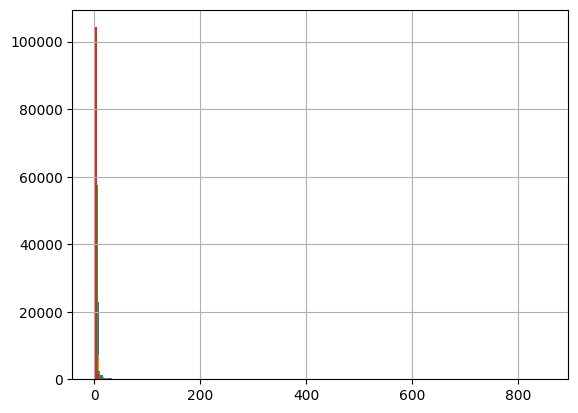

In [22]:
def process_clustering(name):
    clustering = pd.read_csv('clustering/{}_cluster.tsv'.format(name), delimiter='\t', header=None)
    #rename heading as cluster reference and id
    clustering.columns = [name, 'Entry']
    clustering.drop_duplicates(subset='Entry', keep='first', inplace=True)
    print(clustering[name].nunique())
    clustering[name].value_counts().hist(bins=100)
    return clustering

swissprot = swissprot[['Entry', 'Entry Name', 'Sequence', 'EC number', 'Length', 'EC All']]

cluster50 = process_clustering('clusterRes50')
cluster30 = process_clustering('clusterRes30')
cluster70 = process_clustering('clusterRes70')
cluster90 = process_clustering('clusterRes90')

swissprot = pd.merge(swissprot, cluster50, on='Entry', how='left')
swissprot = pd.merge(swissprot, cluster30, on='Entry', how='left')
swissprot = pd.merge(swissprot, cluster70, on='Entry', how='left')
swissprot = pd.merge(swissprot, cluster90, on='Entry', how='left')

swissprot

In [18]:
swissprot['EC3'] = swissprot['EC number'].str.split('.').str[:3].str.join('.')
swissprot['EC2'] = swissprot['EC number'].str.split('.').str[:2].str.join('.')
swissprot['EC1'] = swissprot['EC number'].str.split('.').str[:1].str.join('.')
swissprot.to_csv('../processed_data/protein2EC.csv', index=False)

/tmp/ipykernel_1763802/4218798898.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swissprot['EC3'] = swissprot['EC number'].str.split('.').str[:3].str.join('.')
/tmp/ipykernel_1763802/4218798898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swissprot['EC2'] = swissprot['EC number'].str.split('.').str[:2].str.join('.')
/tmp/ipykernel_1763802/4218798898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

# Finally process textual description of EC numbers
This is optionally used in CREEP

`raw_data/ECtoGO_raw.txt` was downloaded from http://current.geneontology.org/ontology/external2go/ec2go

In [19]:
#read ECtoGO.txt line by line
ECtoGO = open("raw_data/ECtoGO_raw.txt", "r")
ECtoGO_lines = ECtoGO.readlines()
ECtoGO.close()

#skip the first two lines
ECtoGO_lines = ECtoGO_lines[2:]
EC2desc = {}
for line in ECtoGO_lines:
    line = line.strip().split(">")
    EC = line[0][3:-1]
    desc = line[1].split(";")[0][4:-1]
    EC2desc[EC] = desc

def get_EC_desc(EC):
    num_dashes = EC.count('-')

    description_missing = False
    EC1 = '.'.join(EC.split('.')[:1])
    if EC1 + '.-.-.-' in EC2desc and num_dashes < 3:
        desc1 = EC2desc[EC1 + '.-.-.-']
    else:
         desc1 = ''
    EC2 = '.'.join(EC.split('.')[:2]) 
    if EC2 + '.-.-' in EC2desc and num_dashes < 2:
        desc2 = EC2desc[EC2 + '.-.-']
    else:
        desc2 = ''
    EC3 = '.'.join(EC.split('.')[:3])
    if EC3 + '.-' in EC2desc and num_dashes < 1:
        desc3 = EC2desc[EC3 + '.-']
    else:
        desc3 = ''
        
    if EC in EC2desc:
        desc4 = EC2desc[EC]
    else:
        description_missing = True
        desc4 = ''

  
    description = desc1 + '; ' + desc2 + '; ' + desc3 + '; ' + desc4
    description = description.replace(' ; ', ' ')
    description = description.replace(' ; ', ' ')
    description = description.replace(' ; ', ' ')
    description = description.replace(' activity', '')
    #if string starts with ;, replace with space
    if description[0] == ';':
        description = description[2:]
    if description[-2:] == '; ':
        description = description[:-2]
    return description

#subset to the EC numbers in swissprot
EC2desc_df = pd.DataFrame(swissprot['EC number'].unique(), columns=['EC number'])
EC2desc_df['Text'] = EC2desc_df['EC number'].apply(get_EC_desc)
EC2desc_df['Text Incomplete'] = ~EC2desc_df['EC number'].isin(EC2desc.keys())
EC2desc_df = EC2desc_df.sort_values(by='EC number')
EC2desc_df = EC2desc_df[EC2desc_df['EC number'].isin(swissprot['EC number'].unique())]
EC2desc_df

,EC number,Text,Text Incomplete
327,1.1.1.1,"oxidoreductase; oxidoreductase, acting on CH-O...",False
2573,1.1.1.10,"oxidoreductase; oxidoreductase, acting on CH-O...",False
1658,1.1.1.100,"oxidoreductase; oxidoreductase, acting on CH-O...",False
2147,1.1.1.101,"oxidoreductase; oxidoreductase, acting on CH-O...",False
2119,1.1.1.102,"oxidoreductase; oxidoreductase, acting on CH-O...",False
...,...,...,...
83,7.6.2.5,primary active transmembrane transporter; ABC-...,False
1727,7.6.2.6,primary active transmembrane transporter; ABC-...,False
4695,7.6.2.7,primary active transmembrane transporter; ABC-...,False
934,7.6.2.8,primary active transmembrane transporter; ABC-...,False


In [20]:
EC2desc_df.to_csv('../processed_data/text2EC.csv', index=False)

In [21]:
#save ECs to a txt as the order of the cluster centers for downstream tasks
with open('../processed_data/EC_list.txt', 'w') as f:
    for ec in EC2desc_df['EC number']:
        f.write(ec + '\n')

raw_data/price.tsv was downloaded from the CLEAN repo.